# 1조 홍성진 Expoloration_01_Rock_Scissor_Paper

In [1]:
import tensorflow as tf
from tensorflow import keras

from PIL import Image
import glob
import os

## Resize image 정의

In [2]:
#resize images 정의
def resize_images(img_path):
    images = glob.glob(img_path + "\*.jpg")
    
    print(len(images), " images to be resized")
    
    #파일마다 28x28사이즈로 변경 후 저장
    target_size = (28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images)), "images resized."

## Resize

In [3]:
#가위 이미지가 저장 된 디렉토리 아래의 모든 jpg 파일 읽어서 resize
image_dir_path = os.getenv("USERPROFILE") + "\\Self_Study\\LMS\\Exp\\Ex_1\\rock_scissor_paper\\scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

679  images to be resized
679
가위 이미지 resize 완료!


In [4]:
#바위 이미지가 저장 된 디렉토리 아래의 모든 jpg 파일 읽어서 resize
image_dir_path = os.getenv("USERPROFILE") + "\\Self_Study\\LMS\\Exp\\Ex_1\\rock_scissor_paper\\rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

860  images to be resized
860
바위 이미지 resize 완료!


In [5]:
#보 이미지가 저장 된 디렉토리 아래의 모든 jpg 파일 읽어서 resize
image_dir_path = os.getenv("USERPROFILE") + "\\Self_Study\\LMS\\Exp\\Ex_1\\rock_scissor_paper\\paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

757  images to be resized
757
보 이미지 resize 완료!


## 가위,바위,보 데이터를 읽을 수 있는 함수

In [6]:
#가위,바위,보 데이터를 읽을 수 있는 함수
import numpy as np

def load_data(img_path, number_of_data = 2296): #가위바위보 이미지 개수 총 합 (350x3)
    #가위: 0, 바위: 1, 보: 2
    img_size = 28 # 28x28
    color = 3  #1이면 흑백, 3이면 칼라
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    #imgs = 0행렬(총이미지합 x 이미지사이즈 x 이미지사이즈 x 색깔, 데이터 타입 = 32비트 정수). 생긴거는, 이미지 총합, nxn , 색유무
    
    labels = np.zeros(number_of_data, dtype=np.int32)
    #라벨링 = 이미지 총합, 32비트 정수
    
    idx = 0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype = np.int32)
        imgs[idx,:,:,:] = img #데이터 영역에 이미지 행렬을 복사
        labels[idx]=0 #가위: 0
        idx += 1
       
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype = np.int32)
        imgs[idx,:,:,:] = img #데이터 영역에 이미지 행렬을 복사
        labels[idx]=1 #바위: 1
        idx += 1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype = np.int32)
        imgs[idx,:,:,:] = img #데이터 영역에 이미지 행렬을 복사
        labels[idx]=2 #보: 2
        idx +=1
    
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("USERPROFILE") + "/Self_Study/LMS/Exp/Ex_1/rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train/255.0 #입력은 0~1사이의 값으로 정규화

print("x_train shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2296 입니다.
x_train shape: (2296, 28, 28, 3)
y_train shape: (2296,)


## 이미지 확인

라벨:  0


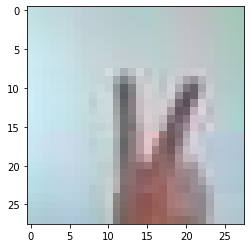

In [20]:
import matplotlib.pyplot as plt
nn=102
plt.imshow(x_train_norm[nn])
print('라벨: ',y_train[nn])

# 딥러닝 네트워크 설계하기

In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3200)              0         
                                                                 
 dense_4 (Dense)             (None, 16)               

# 딥러닝 네트워크 학습시키기

In [24]:
print("Befroe Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs=5)

Befroe Reshape - x_train_norm shape: (2296, 28, 28, 3)
Epoch 1/5
72/72 [==============================] - 2s 18ms/step - loss: 0.6954 - accuracy: 0.7030
Epoch 2/5
72/72 [==============================] - 1s 18ms/step - loss: 0.1755 - accuracy: 0.9538
Epoch 3/5
72/72 [==============================] - 1s 18ms/step - loss: 0.0649 - accuracy: 0.9861
Epoch 4/5
72/72 [==============================] - 1s 18ms/step - loss: 0.0365 - accuracy: 0.9922
Epoch 5/5
72/72 [==============================] - 1s 18ms/step - loss: 0.0187 - accuracy: 0.9978


# 얼마나 잘 만들었는지 (테스트)

### 가위 test이미지 resize

In [11]:
image_dir_path = os.getenv("USERPROFILE") + "\\Self_Study\\LMS\\Exp\\Ex_1\\rock_scissor_paper\\test\\scissor"
resize_images(image_dir_path)

print("가위 Test이미지 rezise 완료!")

106  images to be resized
106
가위 Test이미지 rezise 완료!


### 바위 test이미지 resize

In [12]:
image_dir_path = os.getenv("USERPROFILE") + "\\Self_Study\\LMS\\Exp\\Ex_1\\rock_scissor_paper\\test\\rock"
resize_images(image_dir_path)

print("바위 Test이미지 rezise 완료!")

114  images to be resized
114
바위 Test이미지 rezise 완료!


### 보 test이미지 resize

In [13]:
image_dir_path = os.getenv("USERPROFILE") + "\\Self_Study\\LMS\\Exp\\Ex_1\\rock_scissor_paper\\test\\paper"
resize_images(image_dir_path)

print("보 Test이미지 rezise 완료!")

99  images to be resized
99
보 Test이미지 rezise 완료!


# Test이미지 데이터를 읽을 수 있는 함수

In [14]:
def load_data(img_path, number_of_data=319):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("USERPROFILE") + "\\Self_Study\\LMS\\Exp\\Ex_1\\rock_scissor_paper\\test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 319 입니다.
x_test shape: (319, 28, 28, 3)
y_test shape: (319,)


라벨:  0


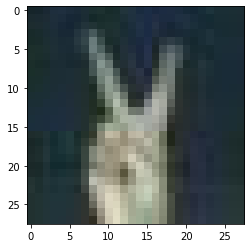

In [22]:
import matplotlib.pyplot as plt
nn=102
plt.imshow(x_test[nn])
print('라벨: ',y_test[nn])

## Test accuracy 측정

In [25]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.7636 - accuracy: 0.9875 - 131ms/epoch - 13ms/step
test_loss: 0.7636111974716187 
test_accuracy: 0.9874607920646667


---

# 회고

첫 번째 Exploration을 하고, 상상으로만 했던 인공지능 구동 매커니즘에 대해 전체적인 흐름을 알 수있어 매우 흥미로웠습니다.

  프로젝트를 진행하며, 인식률을 높히기 위해 많은 시도를 하였지만, 제가 새운 가설과 결과가 맞아 떨어지지 않을 때가 가장 어려웠습니다.<br>
  
  첫 가설은, 다양한 생김세의 가위바위보 샘플 테이터들이 있다면, 이를 다양하게 학습하여 어떠한 테스트 데이터도 인식 할 수있지 않을까 하는 가설이었습니다. 때문에 혼자서도 다양한 각도로 샘플을 수집해 보았고, 또한 같은 조원들의 샘플 데이터까지도 모아 학습 해 보았습니다. 하지만, 다양한 샘플데이터를 담기에는, 고작 몇 천장 정도로는 부족할 것이며, 그 외에도 같은 방의 환경, 뚜렷하지 않은 이미지, 최대 6명뿐의 손 등 학습시키기 좋지 않은 조건들을 발견하여 제 가설을 제대로 실천 할 수 없는 환경이라는 것을 깨달았습니다.<br>
  
  그렇게 세운 두 번째 가설은, Exploration 1-3에서 나왔듯, tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크 설계한 부분을 건드려 보는 것이었습니다. 우선, 나와있는 부분들인, Conv2D, Dense 부분에 대하여는 설명이 쓰여있어서, 얼마나 다양한 특징을 살펴볼지, 얼마나 복잡한 알고리즘을 사용할 것인지를 건드려 보았습니다. 사실 이 부분에 관하여서도 정확하게 어떤 특징을 잡는것인지, 복잡한 문제라는것은 어떤 의미인지를 잘 몰랐지만, 최저 16부터, 최대 1024까지 다양하게 조절해 보았습니다. 처음에는 숫자가 높을수록 무조건 유리한게 아닐까? 라는 가설을 세웠었지만, 너무높아도, 너무 낮아도 안된다는 사실을 알게되었습니다. 그 외에, Maxpool은 무엇인지, (2,2)는 무엇을 의미하는 것인지에 대해 조사를 해 보았습니다. 몇 곂의 뉴런을 이용할 것인지 라는 간략한 이야기 외에 깊은 내용을 이해하지 못하여서 큰 값을 만져보지는 못하였습니다. 또한 activation은 어떤 것을 바꿀 수 있을까에 대하여도 궁금하여, 조사하였더니, "rule", "sigmond", "softmax" 라는 것이 있다는것을 알게되었고, 이를 통하여 LeNet 네트워크로 다른 분류문제를 이용할 수도 있갰구나 하고 알게되었습니다. 이렇게 모든 변수들을 조정하여 보았지만, 저의 인식률을 크게 나아지지 않았기에, 최적의 네트워크 값은 넣되, 다른 가설을 또 세워봐야 겠다고 생각하였습니다.<br>
  
  그렇게 세운 세 번째 가설은, 정직하고 정확한 이미지 데이터를 학습시키는 것 이었습니다. 제가 학습시켰던 모든 학습용 데이터 중 사람얼굴이 곂치거나, 손의 이미지가 명확하지 않거나, 사람이 보아도 가위인지 바위인지, 보인지 구분 할 수 없는 이미지들은 모두 지워냈고, 또한 검정 배경에 하얀 손이 보이게끔 다양한 학습데이터를 다시 수집하였습니다. 이 세 번쨰 가설이 가장 눈에 띄는 결과를 나타내었지만, accracy 60%를 겨우 넘길 뿐, 최대 70% 이상은 나오지 않았습니다. 이에 만족할 수 없었던 저는, 마지막 가설을 세웠습니다.<br>
  
  마지막 네 번째 가설은 테스트 데이터이미지 까지 정직하고 정확한 이미지 데이터로 학습시키는 것 이었습니다. 위의 세 번째 가설에서 했듯, 명확하지 않은 데이터는 모두 삭제하고, 다른 데이터가 필요했던 저는, 저의 손으로 하면 학습용 데이터와 너무 비슷할 것 같아 제 3자인, 친구에게 부탁하여 새로운 이미지 데이터를 수집하였습니다. 결국 그렇게 정확한 이미지 데이터로 학습을 시키고, 정확한 이미지 데이터로 테스트를 해 본 결과, 어떻게 시도를 하여도 accuracy 90%를 넘는 뛰어난 결과를 얻게 되었습니다.<br>
  
  이로써, 인식률을 높이는데에 관하여 다양한 방법을 알아보았고, 이를 직관적으로 확인할 수 있었습니다. 60%에서 만족할뻔한 제 자신에서 결국 90%를 넘는 이 프로젝트에 매우 만족하였으며, 자신감이 좀 더 생겼습니다.<br>
  이 외에도 학습시에 accracy가 1이 넘는값이 지속되면 오버피팅 하다 생각이 들어, epochs의 값을 조정하여 다양하게 학습 해 보았습니다.<br>


요약하여,
- 이번 프로젝트에선 인식률을 높히기 위한 나의 노력이 큰 결과를 보이지 못하였을 떄 가장 어려웠습니다.
- 그 인식률을 높히기 위하여 다양하게 공부하고 시도한 부분에서 Maxpool이 무엇인지, activation의 다른종류가 있는지, 학습용, 테스트용 데이터의 질이 얼마나 중요한지를 알아내었습니다.
- 하지만 아직 maxpool(2,2) 값에 대한 부분 등, LeNet을 조정하는 부분에 관하여 모호합니다.
- 루브릭 평가 지표를 맞추기 위해 시도한 것들로는, 데이터를 다양하게 모아보고, LeNet 네트워크의 변수를 수정해 보았고, 학습데이터를 질이 좋은 데이터로만도 사용해 보았고, 테스트 데이터의 질을 높혀보기도 하였습니다. 마지막으로는 오버피팅 되지 않게 하기위해,  epochs값을 조정하여 적당한 반복값을 찾아보기도 하였습니다.
- 만약 루브릭 평가 지표를 달설하지 못하였다면 이번 강의의 세세한 부분까지 캐치하지 못했다고 생각하여 다시한번 분석하고 제가 스스로 바꿔볼 수 있는 변수들은 모두 바꾸어 보았을겁니다.
<br>
앞으로의 다짐은, 제가 생각했던 인공지능과는 생각보다 다른부분에 대해 만족스럽지 못한 결과를 얻었던 것 같습니다. 때문에 앞으로의 공부에서도 조금 더 깊게 공부하여 어떤부분에서 왜 잘못되었는지를 명확하게 알 수 있게끔 알아 볼 예정이며 후에 지식이 쌓였을 떄에는, 저의 가설이 바로 통할 수 있게끔 방대한 지식을 갖게끔 할 것입니다.

감사합니다.